In [1]:
from data import Portfolio, Dataset
from utils import *
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

In [2]:
# define stock list of portfolio (just AAPL in this case)
stock_list = ['AAPL']

# define desired start and end dates
start = '1980-01-01'
end = '2020-01-01'

# construct pandas dataframe of portfolio returns to instantiate Portfolio object 
# (in this case from yfinance)
returns = yf.Ticker('AAPL').history(start=start,end=end)

# construct Portfolio object implemented in data.py
apple = Portfolio('AAPL', stock_list, returns, start=start,end=end)

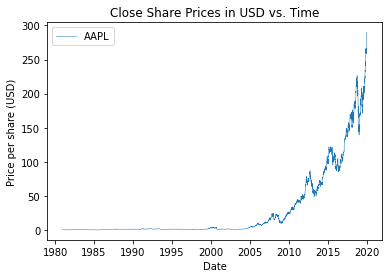

In [3]:
ax1 = apple.price_plot(['returns'],'Close',start,end)
plt.show()

In [4]:
# define feature names, target name, periods
feature_names = stock_list
target_name = 'returns'
periods = list(range(1,21)) + list(range(40,260,20))

# instantiate data object 
apple_data = Dataset(apple, 'Close', feature_names, periods, target_name)

In [5]:
print("Number of features", apple_data.n_features)
print("Number of classes", apple_data.n_classes)
print("Number of datapoints", apple_data.n_samples)

Number of features 31
Number of classes 2
Number of datapoints 9605


In [6]:
print('Number of negative movement days in AAPL', apple_data.target[apple_data.target == 0].shape[0])
print('Number of positive movement days in AAPL', apple_data.target[apple_data.target == 1].shape[0])

Number of negative movement days in AAPL 4078
Number of positive movement days in AAPL 5527


We first display summary statistics:

In [7]:
df_stat = apple_data.statistics(features=['AAPL'],periods=periods)
display(df_stat)

,"(AAPL, 1)","(AAPL, 2)","(AAPL, 3)","(AAPL, 4)","(AAPL, 5)","(AAPL, 6)","(AAPL, 7)","(AAPL, 8)","(AAPL, 9)","(AAPL, 10)",...,"(AAPL, 60)","(AAPL, 80)","(AAPL, 100)","(AAPL, 120)","(AAPL, 140)","(AAPL, 160)","(AAPL, 180)","(AAPL, 200)","(AAPL, 220)","(AAPL, 240)"
count,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,...,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000
mean,0.001160,0.002323,0.003463,0.004570,0.005698,0.006830,0.007976,0.009123,0.010270,0.011405,...,0.072773,0.097935,0.123541,0.148984,0.175169,0.201045,0.227600,0.254097,0.281397,0.308902
std,0.029000,0.041068,0.049893,0.056890,0.063447,0.069354,0.074949,0.080117,0.084993,0.089599,...,0.241542,0.290196,0.339109,0.384302,0.430157,0.474186,0.517139,0.557614,0.596333,0.631024
var,0.000841,0.001687,0.002489,0.003236,0.004026,0.004810,0.005617,0.006419,0.007224,0.008028,...,0.058343,0.084214,0.114995,0.147688,0.185035,0.224853,0.267433,0.310934,0.355614,0.398192
kurtosis,18.084764,11.311113,9.340400,7.571508,6.906095,6.173979,5.826516,5.460062,5.135380,4.664205,...,1.249495,1.641189,1.760391,2.181756,2.926230,3.254798,3.190305,3.638053,3.595004,2.880139
skewness,-0.382236,-0.085574,-0.030444,-0.016608,0.010410,-0.017472,-0.013748,-0.002635,-0.000389,0.005409,...,0.294471,0.573997,0.804786,0.968987,1.138349,1.284594,1.363823,1.439311,1.429844,1.328833
min,-0.519637,-0.546828,-0.583082,-0.558912,-0.589124,-0.586103,-0.595166,-0.610272,-0.634441,-0.628032,...,-0.763926,-0.765306,-0.753463,-0.747253,-0.723112,-0.773438,-0.800448,-0.780303,-0.753541,-0.737892
25%,-0.013423,-0.018868,-0.022989,-0.026316,-0.028702,-0.031579,-0.034483,-0.036388,-0.038225,-0.039370,...,-0.073684,-0.081633,-0.100000,-0.100000,-0.106195,-0.107692,-0.104132,-0.116883,-0.129310,-0.153190
50%,0.000000,0.000000,0.000000,0.000841,0.003509,0.004743,0.006098,0.007145,0.008155,0.009259,...,0.066401,0.086957,0.101484,0.127458,0.138614,0.160270,0.166667,0.182609,0.206897,0.222222
75%,0.015340,0.022449,0.028402,0.034063,0.038462,0.043478,0.048387,0.053571,0.056738,0.059378,...,0.212194,0.257249,0.288288,0.320000,0.357202,0.395263,0.438525,0.483871,0.536232,0.587211


We first GridSearch on the data until 1996 using 5-fold cross validation:

In [8]:
from sklearn.model_selection import GridSearchCV

def algorithm_pipeline(X_train_data, y_train_data, model, param_grid, cv=10, scoring_fit='roc_auc'):
    
    gs = GridSearchCV(estimator=model,param_grid=param_grid, cv=cv, n_jobs=-1, scoring=scoring_fit,verbose=2)
    
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    return fitted_model

In [9]:
from sklearn.model_selection import train_test_split

X_1996 = apple_data.data.loc['1980-01-01':'1996-01-01'].to_numpy()
y_1996 = apple_data.target.loc['1980-01-01':'1996-01-01'].to_numpy()

In [10]:
import xgboost as xgb

params = {'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [6, 10, 20, 50],'min_child_weight': [1, 2, 5, 11, 20],'colsample_bytree': [0.3, 0.4, 0.6, 0.7, 0.8]}

xgb_model = xgb.XGBClassifier(n_estimators=200, objective='binary:logistic')

model = algorithm_pipeline(X_1996, y_1996, xgb_model, params, cv=5)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.8min finished


In [12]:
print('Best ROC AUC', model.best_score_)
print('Best params', model.best_params_)

Best ROC AUC 1.0
Best params {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1}


We have now gridsearched and have our optimal parameters. Seems like a massive overfitting problem. We now train the data iteratively year by year until 2014, adding in the data from the year, and computing the feature importances at each step.

In [15]:
from sklearn import metrics

params = model.best_params_

xgb_model = xgb.XGBClassifier(**params)

years = list(range(1997,2014))

# initialize data
X = apple_data.data.loc['1990-01-01':'1996-01-01'].to_numpy()
y = apple_data.target.loc['1990-01-01':'1996-01-01'].to_numpy()

# fit on data until 1996
xgb_model.fit(X, y)
# save model
xgb_model.save_model(f'model_1996_stock.model')
impt = xgb_model.get_booster().get_score(importance_type='weight')
for key in impt.keys():
    impt[key] = [impt[key]]

roc_auc_scores = []

for year in years:
    print(f'iterative training on year {year}...')
    year_X, year_y = apple_data.data.loc[f'{year}-01-01':f'{year}-12-31'].to_numpy(), apple_data.target.loc[f'{year}-01-01':f'{year}-12-31'].to_numpy()
    
    X_train, y_train = np.concatenate((X, year_X), axis=0), np.concatenate((y, year_y), axis=0)
    
    X_test, y_test = apple_data.data.loc[f'{year+1}-01-01':f'{year+1}-12-31'].to_numpy(), apple_data.target.loc[f'{year+1}-01-01':f'{year+1}-12-31'].to_numpy()
    
    if os.path.isfile(f'model_{year-1}_stock.model'):
        xgb_model.fit(X_train, y_train, xgb_model=f'model_{year-1}_stock.model')
    else:
        xgb_model.fit(X_train, y_train)
        
    xgb_model.save_model(f'model_{year}_stock.model')
    # feature importances
    impt_year = xgb_model.get_booster().get_score(importance_type='weight')

    
    for key in impt_year.keys():
        impt[key].append(impt_year[key])
    
    # check predictions and get ROC_AUC
    preds = xgb_model.predict(X_test)
    roc_auc_scores.append(metrics.roc_auc_score(y_test, preds))
       

iterative training on year 1997...
iterative training on year 1998...
iterative training on year 1999...
iterative training on year 2000...
iterative training on year 2001...
iterative training on year 2002...
iterative training on year 2003...
iterative training on year 2004...
iterative training on year 2005...
iterative training on year 2006...
iterative training on year 2007...
iterative training on year 2008...
iterative training on year 2009...
iterative training on year 2010...
iterative training on year 2011...
iterative training on year 2012...
iterative training on year 2013...


We can now look at feature importances:

In [16]:
impt_df = pd.DataFrame(impt, index=[1996] + years)
display(impt_df)

,f0,f3,f6,f23,f16,f18,f13,f27,f29,f11,...,f8,f28,f7,f12,f22,f1,f9,f20,f15,f21
1996,29,200,105,72,73,61,62,66,66,63,...,78,76,110,85,77,168,104,63,56,50
1997,58,274,152,113,114,118,103,116,124,107,...,131,132,204,146,128,269,160,96,91,79
1998,87,294,163,125,140,145,112,126,137,126,...,154,141,222,178,154,306,189,101,104,86
1999,116,303,175,126,142,149,116,145,138,130,...,157,145,226,180,155,322,190,106,113,88
2000,130,322,175,127,142,156,116,145,141,130,...,159,147,227,180,157,332,190,106,113,88
2001,130,322,175,127,142,158,116,145,142,130,...,159,147,227,180,157,332,190,106,113,88
2002,130,322,175,127,142,158,116,145,142,130,...,159,147,227,180,157,332,190,106,113,88
2003,130,322,175,127,142,158,116,145,142,130,...,159,147,227,180,157,332,190,106,113,88
2004,130,322,175,127,142,158,116,145,142,130,...,159,147,227,180,157,332,190,106,113,88
2005,156,327,179,127,142,158,117,146,148,131,...,161,153,234,184,157,343,195,108,113,88


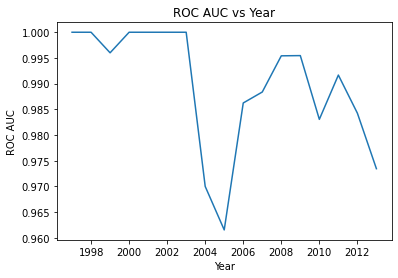

In [17]:
plt.plot(years, roc_auc_scores)
plt.xlabel('Year')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs Year')
plt.show()